**Introduction**

Air Pollution has adversely affected the lifestyle of the people in the recent past. The major causes of air pollution or decline in the air quality are increase in the number of industries and their emissions. As a Data Scientist, I have been assigned a task for WHO in predicting the Air Quality by analysing the dataset that contains the information of Temperature, Humidity, Concentration of different gases in the atmosphere. In this project I will be building a neural network in predicting the air quality based on features: Temperature, Humidity, Concentration of gases, proximity to industry.
Predicting the air quality can significantly help the goverment in finding the areas where air quality improvement is needed and in taking the suitable measures to improve the same, which in turn can improve the health conditions of the people.

Dataset source: Kaggle

URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

**1) Import Libraries and Functions**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**2) Data Reading and Exploration**

In [ ]:
df = pd.read_csv('air_quality.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


**Details of the available features:**

Temperature: Avg temp of the region in degree Celsius

Humidity: Relative humidity recorded in the region in percentage

PM2.5: Concentration of Fine particulate matter levels in µg/m³

PM10: Concentration of Coarse particulate matter levels

NO2: Concentration of Nitrogen dioxide in ppb

SO2: Concentration of Sulfur dioxide levels in ppb

CO: Concentration of Carbon monoxide levels in ppb

Proximity to Industrial Areas: Distance to the nearest industrial zone in km

Population Density: Number of people per square kilometer in the region in people per sq km.

In [ ]:
#Check for null values
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
#Check data types
df.dtypes

,0
Temperature,float64
Humidity,float64
PM2.5,float64
PM10,float64
NO2,float64
SO2,float64
CO,float64
Proximity_to_Industrial_Areas,float64
Population_Density,int64
Air Quality,object


Data type of the Feature 'Air Quality' is Object. Hence we convert them into Numerical values for better processing. We use Label Encoding for this process.

**3)Label Encoding**

In [ ]:
label_encoder = LabelEncoder()

# Apply Label Encoding
df['Air Quality Encoded'] = label_encoder.fit_transform(df['Air Quality'])

# To see the mapping of categories to numerical values
print("\nMapping of Categories of Air quality:")
for category, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{category} -> {encoded_value}")


df[['Air Quality Encoded', 'Air Quality']].head(7)


Mapping of Categories of Air quality:
Good -> 0
Hazardous -> 1
Moderate -> 2
Poor -> 3


,Air Quality Encoded,Air Quality
0,2,Moderate
1,2,Moderate
2,2,Moderate
3,0,Good
4,0,Good
5,1,Hazardous
6,3,Poor


**4)Visualizations**

4.1) Concentration of different Pollutants Vs Air Quality

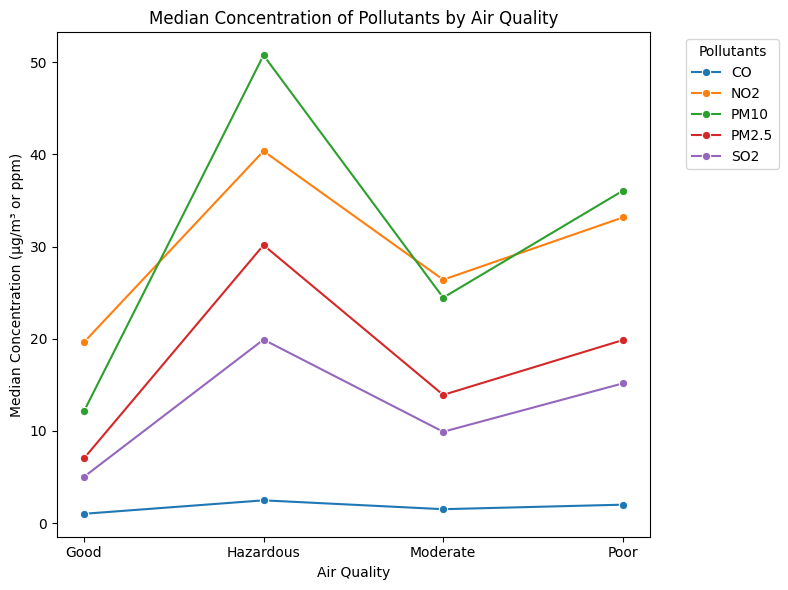

In [ ]:
#Combining the features
combined_data = pd.melt(df,
                       id_vars=['Air Quality'],
                       value_vars=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO'],
                       var_name='Pollutant',
                       value_name='Concentration')

# Groupoing the variables and obtaining the median
grouped_data = combined_data.groupby(["Air Quality", "Pollutant"])["Concentration"].median().reset_index()

#Plotting
plt.figure(figsize=(8, 6))
sns.lineplot(data=grouped_data, x="Air Quality", y="Concentration", hue="Pollutant", marker="o")
plt.title("Median Concentration of Pollutants by Air Quality")
plt.ylabel("Median Concentration (µg/m³ or ppm)")
plt.xlabel("Air Quality")
plt.legend(title="Pollutants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the above plot we can confirm that 'Hazardous' air quality is mainly due to high concentraion of PM10 and NO2. CO inspite of being one of the deadliest gases, its concentration in the atmosphere is approximately zero. PM2.5 and SO2 also has an average impact on the air quality.

4.2) Correlation mapping of features

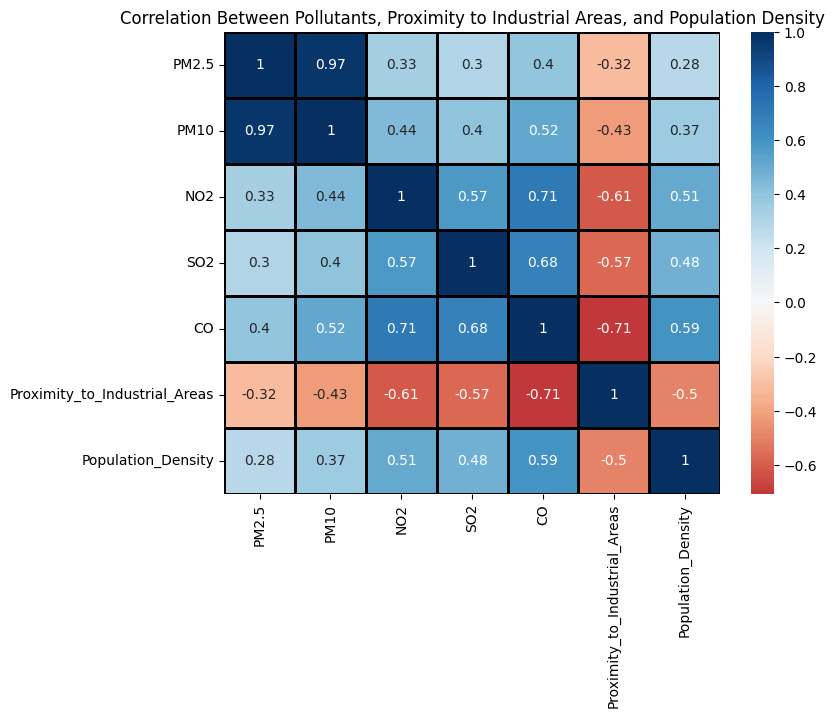

In [ ]:
#Selecting features
correlation_data = df[["PM2.5", "PM10", "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas", "Population_Density"]].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True,cmap='RdBu', center=0, linewidths=1, linecolor='black')
plt.title("Correlation Between Pollutants, Proximity to Industrial Areas, and Population Density")
plt.show()




From the above correlation mapping we can conclude that PM10 and NO2 have very high impact on Air Quality, however these might not be emmisson from the industries, rather it could be emission from the vehicles or from other sources, as they have negative values with respect to Proximity to Industries, on the other hand, they have a significatly positive value with respect to the population density.

4.3) Distribution of different features

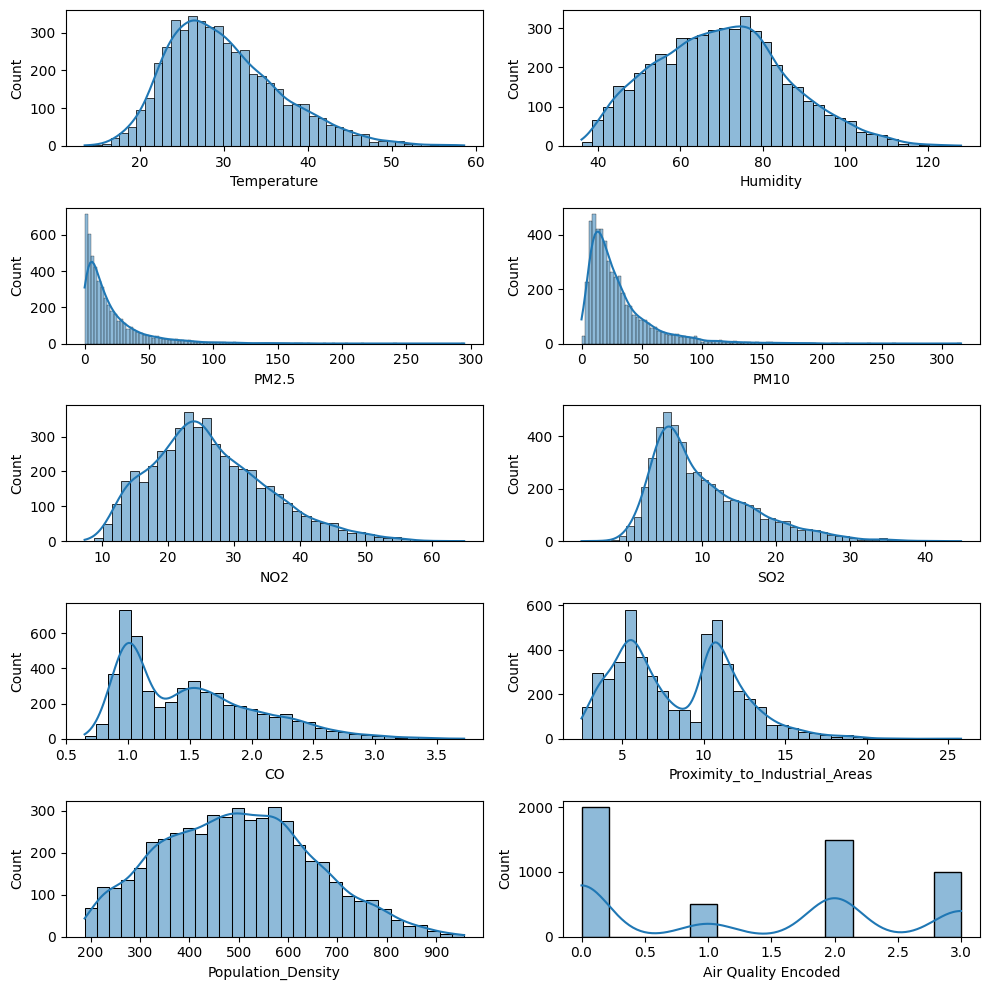

In [ ]:
#Distribution of different features

fig,ax=plt.subplots(5,2,figsize=(10,10))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

4.4) Distribution of Air Qualities: Good, Moderate, Poor, Hazardous

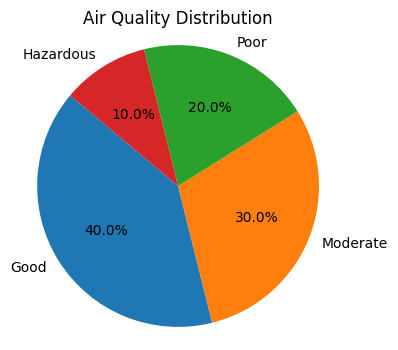

In [ ]:
#Distribution of Air Qualities

air_quality = df['Air Quality']
value_counts = air_quality.value_counts()

# Calculating distribution of air quality
air_quality_distribution = df['Air Quality'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(air_quality_distribution, labels=air_quality_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Air Quality Distribution')
plt.axis('equal')
plt.show()


The above pie chart represents the distribution of different air qualities. 40% of them belong to 'Good' Air quality, however, 30, 20 and 10 percentages for Moderate, Poor and Hazardous categories respectively. This signifies that there is an imbalance in the Air Quality variable.

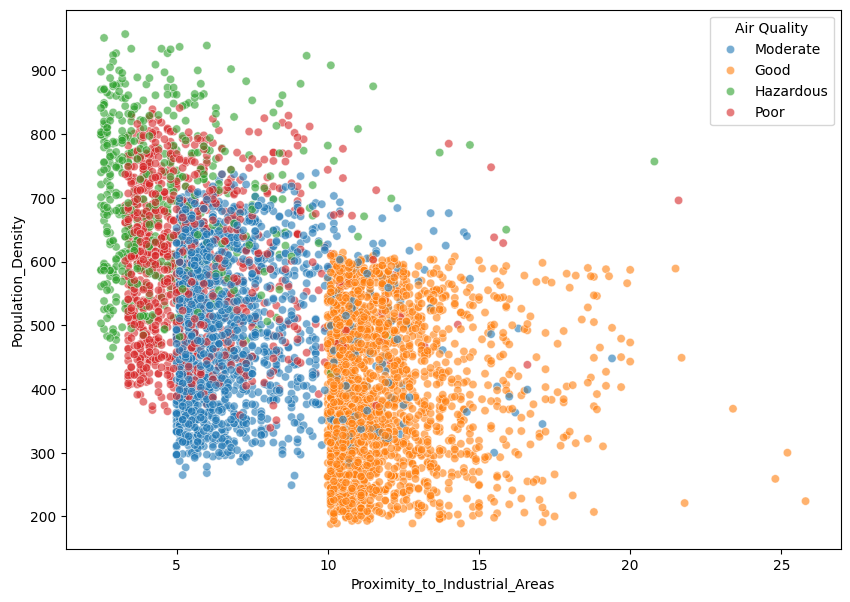

In [ ]:
#Assessing Quality of Air with regards to Proximity to Industrial Area

plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

The above scatter plot gives us the idea that Air quality is the best when Population density is very low and not in proximity to the Industrial areas. On the other hand, air quality is the worst when population density is high and in close proximity to Industries. This signifies that Population Density and Proximity to the industries are the 2 major factors that impacts the Air Quality of a region.

**5) Standardizing Numerical Values**

In [ ]:
# Standardize columns with numerical values
stdz = StandardScaler()

# Assuming you want to standardize all numerical features:
numerical_features = ['Temperature','Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
X = df[numerical_features]
x = stdz.fit_transform(X)
y = df['Air Quality Encoded']

**6) Splitting Data into Train, Test and Validation sets**

In [ ]:
#Train Test Data split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, random_state=42, train_size=0.7, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, random_state=42, test_size=0.5, stratify=y_temp)


**7) Model Building**

7.1) Model 1 - Dense Neural Network

In [ ]:
#Model1

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='softmax')

])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6307 - loss: 1.4153 - val_accuracy: 0.9000 - val_loss: 0.2596
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.2808 - val_accuracy: 0.9120 - val_loss: 0.2176
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.2159 - val_accuracy: 0.9213 - val_loss: 0.1910
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9113 - loss: 0.2009 - val_accuracy: 0.9147 - val_loss: 0.1941
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.1923 - val_accuracy: 0.9173 - val_loss: 0.1916
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.1630 - val_accuracy: 0.9213 - val_loss: 0.1785
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.1769 - val_accuracy: 0.9307 - val_loss: 0.1640
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.1513 - val_accuracy: 0.

7.2) Model 2 - Combination of Convential Neural Network and LSTM

In [ ]:
#Model2

model2 = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5575 - loss: 1.4331 - val_accuracy: 0.8200 - val_loss: 0.4657
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7944 - loss: 0.4985 - val_accuracy: 0.9213 - val_loss: 0.2510
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8897 - loss: 0.2877 - val_accuracy: 0.9027 - val_loss: 0.2297
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9056 - loss: 0.2424 - val_accuracy: 0.9133 - val_loss: 0.1903
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9238 - loss: 0.2096 - val_accuracy: 0.9253 - val_loss: 0.1796
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9222 - loss: 0.2094 - val_accuracy: 0.9147 - val_loss: 0.1951
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9237 - loss: 0.1962 - val_accuracy: 0.9253 - val_loss: 0.1690
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9341 - loss: 0.1739 - val_accuracy:

We can see that Model2 has a higher validation accuracy compared to Model1. Hence we apply the same to the Test set.

**8) Applying Model2 and making prediction on the test set**

8.1) Applying Model2 on Test set

In [ ]:
model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9592 - loss: 0.1076 - val_accuracy: 0.9453 - val_loss: 0.1574
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9553 - loss: 0.1032 - val_accuracy: 0.9533 - val_loss: 0.1519
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9544 - loss: 0.1119 - val_accuracy: 0.9507 - val_loss: 0.1607
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9597 - loss: 0.1032 - val_accuracy: 0.9533 - val_loss: 0.1503
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9576 - loss: 0.1025 - val_accuracy: 0.9493 - val_loss: 0.1510
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9582 - loss: 0.1024 - val_accuracy: 0.9560 - val_loss: 0.1446
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9605 - loss: 0.0964 - val_accuracy: 0.9387 - val_loss: 0.1876
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9605 - loss: 0.1026 - val_accuracy: 0

8.2) Making prediction on Test set

In [ ]:
#Prediction on test set using Model2
y_pred_model2 = model2.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


8.3) Model Evaluation

In [ ]:
model2_accuracy = model2.evaluate(x_test, y_test)

print(f"LR Accuracy: {100*model2_accuracy[1]:.2f}%\n")
print(classification_report(y_test, np.argmax(y_pred_model2, axis=1)))


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1629
LR Accuracy: 95.73%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.93      0.87      0.90        75
           2       0.96      0.97      0.96       225
           3       0.89      0.91      0.90       150

    accuracy                           0.96       750
   macro avg       0.94      0.93      0.94       750
weighted avg       0.96      0.96      0.96       750



**8.4) Different configurations on both the Models**

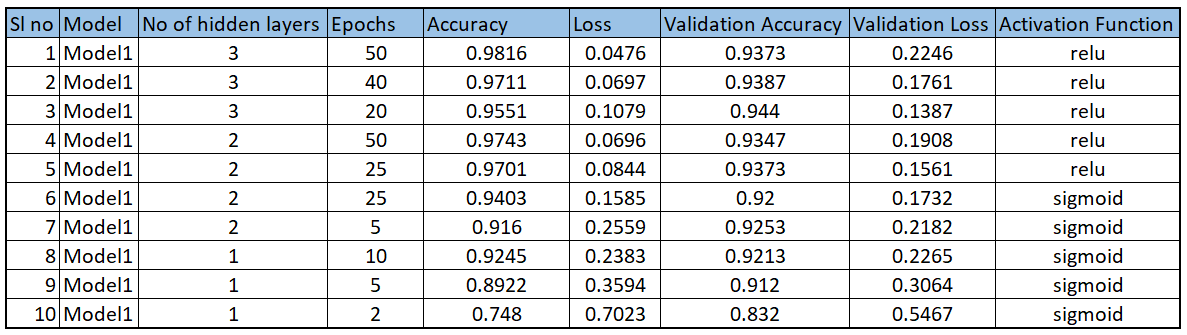

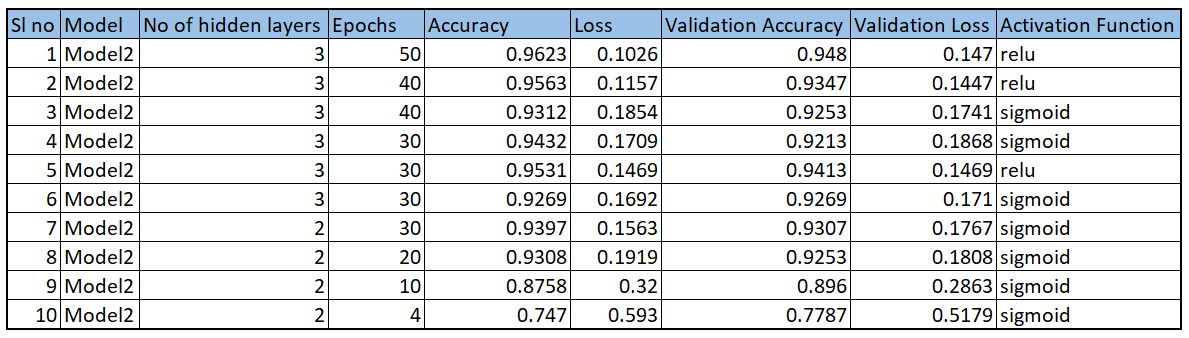

**9) Conclusion**

In this project we performed the analysis of a dataset for Air Quality and how different pollutants and factors like Population Density and Proximity to industries create changes in the quality of the air. We observed that Air quality is good in the places where Population density is very low which is also away from Industrial areas. We also created 2 Models: Dense Neural Network and Combination of Conventional Neural Network and LSTM with validation accuracies of 93% and 94% respectively. We have used activation funcrions such as sigmoid and relu.

However, some of the drawbacks of the models are lack of normalization and regularization. The use of activation function relu is very common, and this can result in problems of vanishing gradient if the inputs are small. Model2 consists of combination of LSTM and Conv1D which makes it very complex and a bit time consuming in training and might take higher resource consumption, especially for large datasets.




Recommendations:

1) A broad dataset with more features and data could possibly help in much accurate and better prediction, as the air quality is also determined by other factors such as severity of the emissions from industries, usage of private and public transports where population density is very high.

2) Adding more layers with other activation functions such as leakyrelu

3) Normalization of the data and making sure that shape matches Flatten layer.

4) Adding Regularization (l2) and increasing dropout to overcome overfitting.

5) Adding MaxPooling1D after Conv1D could be beneficial in dimentionality reduction and feature selection.